In [7]:
from operator import mod
from tomo2mesh.misc.voxel_processing import TimerGPU, edge_map, modified_autocontrast, get_values_cyl_mask, cylindrical_mask
from tomo2mesh.projects.eaton.recon import recon_binned, recon_all, preprocess
from tomo2mesh.projects.eaton.params import pixel_size_1X as pixel_size
from tomo2mesh.projects.eaton.rw_utils_ae import read_raw_data_1X, save_path
from tomo2mesh.unet3d.surface_segmenter import SurfaceSegmenter
from tomo2mesh.structures.grid import Grid
from tomo2mesh.structures.patches import Patches

import cupy as cp
import numpy as np
from tomo2mesh.structures.voids import Voids
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local
from cupyx.scipy import ndimage
from scipy import ndimage as ndimage_cpu
from scipy import ndimage as ndimage_cpu
import matplotlib.pyplot as plt


In [2]:
b = 4
projs, theta, center, dark, flat = read_raw_data_1X("1", "125")


In [20]:
iz = 100
data = cp.array(projs[:,iz-16:iz+16,:].astype(np.float32), dtype = cp.float32)
preprocess(data, cp.array(dark[iz-16:iz+16].astype(np.float32), dtype = cp.float32), cp.array(flat[iz-16:iz+16].astype(np.float32), dtype = cp.float32), pixel_size*1.0e-4, outlier_removal = True)


In [26]:
sino_single = data[:,15,:].get()

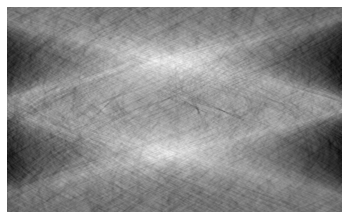

In [29]:
plt.imshow(sino_single, cmap = "gray")
plt.axis("off")
plt.show()
